In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

#read in dataset and print contents
df = pd.read_csv('PRT_Usage.csv')
df_r = pd.read_csv('PRT Availability.csv')
print(df.head())
print(df_r.head())


      Month  Miles Traveled  Passengers  Average Operational Vehicles  \
0  Jan-1985         67594.0      205521                         54.59   
1  Feb-1985         81431.0      268682                         53.90   
2  Mar-1985         75122.0      222300                         58.13   
3  Apr-1985         91214.0      281254                         55.60   
4  May-1985         42992.0       96018                         42.82   

   Service Days  
0            20  
1            23  
2            23  
3            25  
4            23  
      Month  System Dependability  Trip Reliability  Scheduled Hours  \
0  Jan-1985                0.9837            0.9973       314.583333   
1  Feb-1985                0.9712            0.9964       353.583333   
2  Mar-1985                0.9940            0.9985       345.250000   
3  Apr-1985                0.9932            0.9975       384.750000   
4  May-1985                0.9896            0.9988       304.500000   

   Operated Hours  D

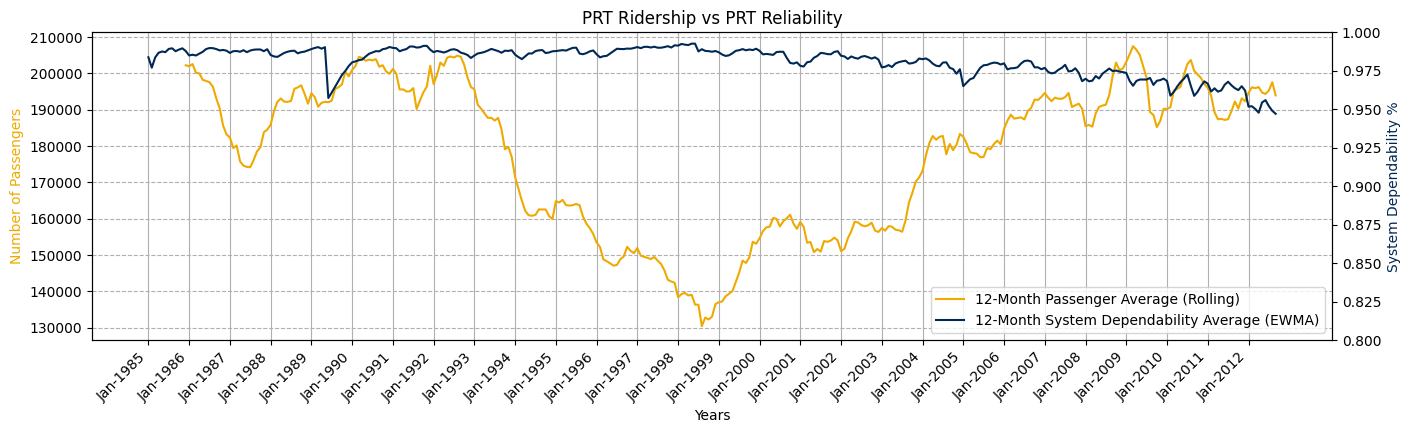

In [81]:
#Create axes
x = df['Month']
y = df['Passengers']
y2 = df_r['System Dependability']

df_r['rel_rolling_ave'] = y2.replace(0, np.nan).ewm(span=12, min_periods=1).mean()

df['rolling_ave'] = df['Passengers'].rolling(window=12, center=False).mean()
month_ave = df['rolling_ave']

x_lines = y[::12]
x_labels = x[::12]

#Create sub-plot
fig, ax1 = plt.subplots(figsize=(16, 4))

plt.title('PRT Ridership vs PRT Reliability')
ax1.set_xlabel('Years')

#Primary y-axis
color_pass = '#EEAA00'
ax1.set_ylabel("Number of Passengers", color=color_pass)
ax1.plot(df.index, month_ave, color=color_pass, label='12-Month Passenger Average (Rolling)')

ax1.set_xticks(
    ticks=x_lines.index,
    labels=x_labels,
    rotation=45,
    ha='right'
)

ax2 = ax1.twinx()

#Secondary y-axis
color_rel = '#002855'
ax2.set_ylabel('System Dependability %', color=color_rel)
ax2.set_ylim(.80, 1.0)
ax2.plot(x, df_r['rel_rolling_ave'], color=color_rel, label='12-Month System Dependability Average (EWMA)')

#Gridlines
ax1.grid(axis='x', linestyle='-', alpha=1)
ax1.grid(axis='y', linestyle='--', alpha=1)

#legend
line_1, label_1 = ax1.get_legend_handles_labels()
line_2, label_2 = ax2.get_legend_handles_labels()

ax1.legend(line_1 + line_2, label_1 + label_2, loc='lower right')


plt.show()
